# Predict students' dropout and academic success. 
Team member: Daniela Santibanez, Andrew Chen, Hou-An Chen, Jack Liu, Selena Jimenez

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, root_mean_squared_error
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("dataset.csv")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [2]:
## Change 
le = LabelEncoder()
le.fit(df['Target'])
target_classes = le.classes_
print(target_classes)
df['Target'] = le.transform(df['Target'])
df

['Dropout' 'Enrolled' 'Graduate']


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


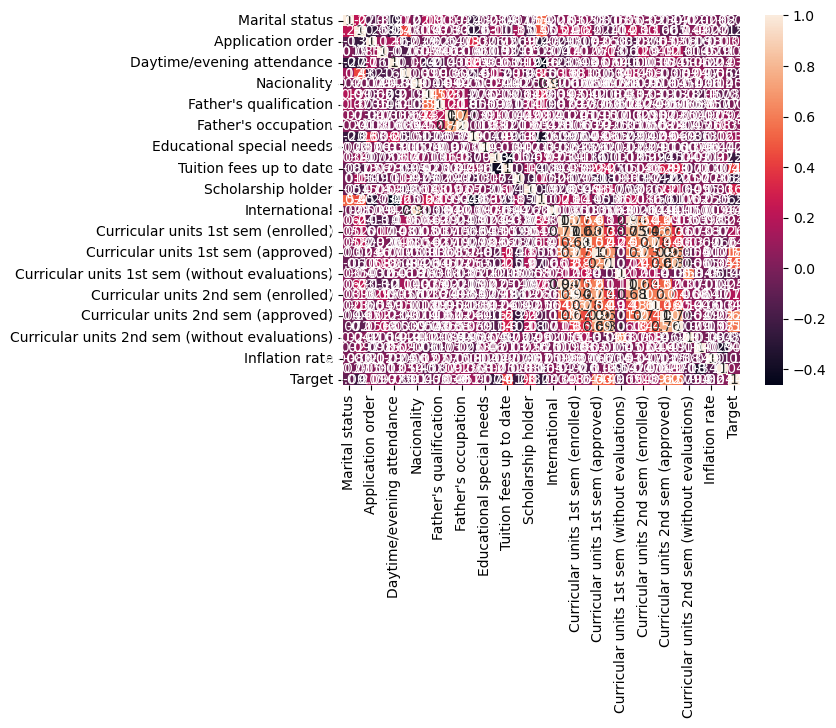

In [3]:
# Covariance Matrix
cov_matrix = pd.DataFrame.corr(df)
sns.heatmap(cov_matrix, annot=True)
plt.show()

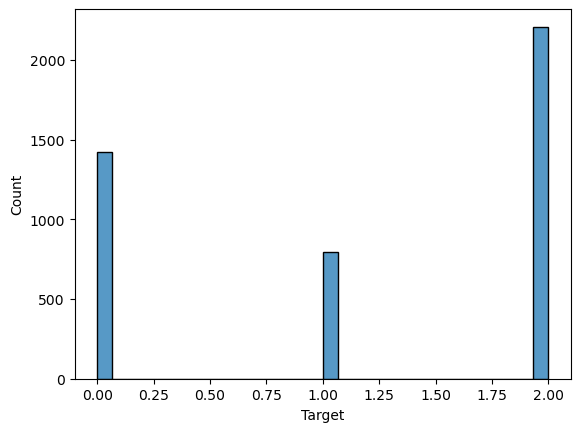

In [4]:
sns.histplot(data=df,x="Target", bins=30)
plt.show()

In [5]:
X = df.drop(["Target"], axis = 1)
y = df[["Target"]]    # Using double braket keep it as data frame so it does not return as series.
print(X.shape)
print(y.shape)

(4424, 34)
(4424, 1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Standardlized the data 
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_std, y_train)

result = permutation_importance(estimator=knn_model,
                                X=X_test_std,
                                y=y_test,
                                scoring='accuracy',
                                n_repeats=50,
                                random_state=0)
indices = np.argsort(result['importances_mean'])[::-1]



c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


([<matplotlib.axis.XTick at 0x27bcdfbcb30>,
 [Text(0, 0, 'Curricular units 2nd sem (approved)'),
  Text(1, 0, 'Tuition fees up to date'),
  Text(2, 0, 'Curricular units 2nd sem (grade)'),
  Text(3, 0, 'Curricular units 1st sem (approved)'),
  Text(4, 0, 'Debtor'),
  Text(5, 0, 'Scholarship holder'),
  Text(6, 0, 'Curricular units 1st sem (evaluations)'),
  Text(7, 0, 'Curricular units 2nd sem (evaluations)'),
  Text(8, 0, 'Course'),
  Text(9, 0, 'Previous qualification'),
  Text(10, 0, 'Daytime/evening attendance'),
  Text(11, 0, 'Curricular units 2nd sem (credited)'),
  Text(12, 0, 'Curricular units 1st sem (grade)'),
  Text(13, 0, 'Application mode'),
  Text(14, 0, 'Curricular units 2nd sem (without evaluations)'),
  Text(15, 0, "Father's occupation"),
  Text(16, 0, 'Curricular units 1st sem (credited)'),
  Text(17, 0, 'Gender'),
  Text(18, 0, "Mother's occupation"),
  Text(19, 0, 'Curricular units 1st sem (enrolled)'),
  Text(20, 0, 'Displaced'),
  Text(21, 0, 'Nacionality'),
  Text

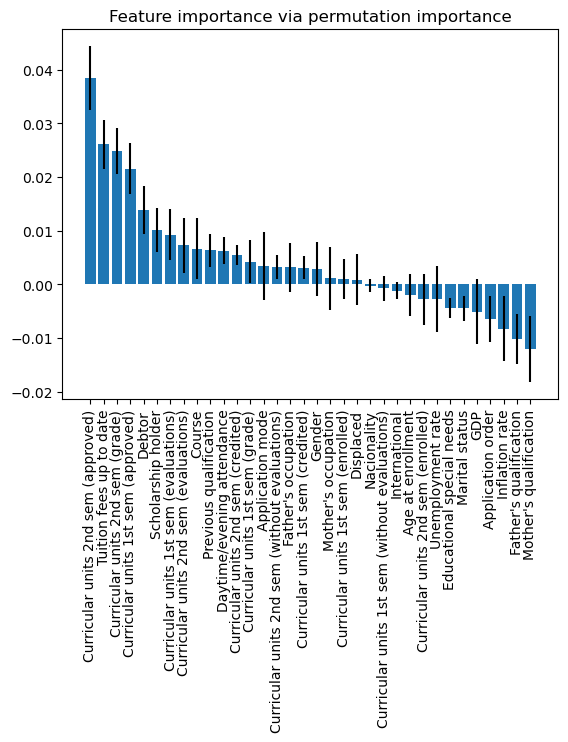

In [12]:
plt.figure()
plt.title('Feature importance via permutation importance')
plt.bar(
    range(X_train.shape[1]),
    result['importances_mean'][indices],
    yerr=result['importances_std'][indices])

feature_names = np.array(list(df.columns[0:])+['random'])
plt.xticks(range(X_test.shape[1]), feature_names[indices], rotation=90)

Text(0, 0.5, 'Cumulative Explained Variance')

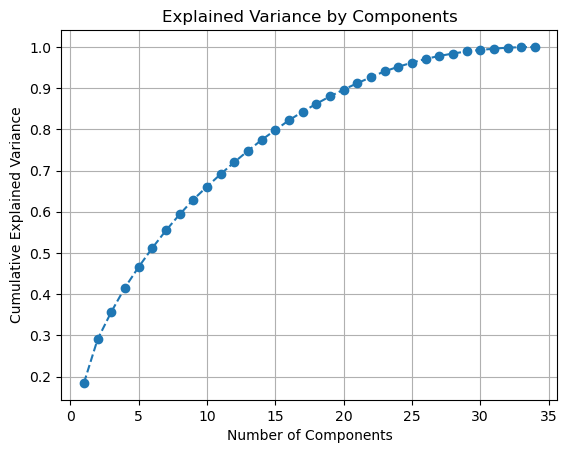

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
scores_pca = pca.fit_transform(X_train_std)
# df_scores_pca = pd.DataFrame(scores_pca, columns = ['Component 1', 'Component 2', 'Component 3'] )
# df_scores_pca.head()


plt.plot(range(1,35), pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle ='--')
plt.grid('both')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [9]:
pca = PCA(n_components=15)
scores_pca = pca.fit_transform(X_train_std)
df_scores_pca = pd.DataFrame(scores_pca)
df_scores_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.630038,0.781352,0.884752,-0.502365,-0.977278,-1.143002,1.874616,-0.228872,1.426286,-0.367773,-2.359395,0.642978,-1.141943,0.888845,-0.278888
1,0.695461,3.200656,-2.572597,0.172171,0.038064,0.876726,-0.224594,-1.072117,1.359154,0.851135,-0.196737,0.689601,1.307669,0.606031,1.644715
2,0.026427,-0.429058,0.456856,-0.435940,0.039193,0.515358,-0.468871,-0.904702,-0.092341,0.833540,-0.979144,0.627442,1.623181,-0.394378,-0.192005
3,-0.034837,-0.213329,-0.864906,-0.213741,0.735270,0.433044,-0.816408,-0.346963,-0.187875,0.423361,-1.561022,0.837180,1.339110,-0.696660,-0.561971
4,0.231889,-1.395874,0.421974,-0.380643,0.258502,0.343601,0.594862,0.585063,-0.494608,0.216380,0.001261,-0.039563,-1.951381,0.818899,0.374415


In [10]:
# Decision Tree Model
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(X_train, y_train)
print("training score: %f" % tree.score(X_train, y_train))
print("testing score: %f" % tree.score(X_test, y_test))

training score: 0.760013
testing score: 0.749247


In [11]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Method
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
print("training score: %f" % rf.score(X_train, y_train))
print("testing score: %f" % rf.score(X_test, y_test))


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


training score: 0.736434
testing score: 0.728163
